# Grover's Search Algorithm with 3 qubits
Built with Python and Qiskit. Theo Chemel, 2019

In [195]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer, Aer
from qiskit.tools.visualization import plot_histogram

# Configure Circuit
q[0] is the oracle qubit  
q[1] is used to aid oracle generation  
q[2 - 4]contain state information  

In [196]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(3, 'c')

circ = QuantumCircuit(q, c)

# State Preparation

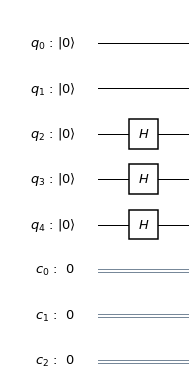

In [197]:
circ.h(q[2])
circ.h(q[3])
circ.h(q[4])
circ.draw(output='mpl')

# Oracle Generation

State S<sub>v</sub>, the "winner" state, is represented by the binary string '011'  
The oracle is stored in q[0], but q[1] is used to aid in its creation.

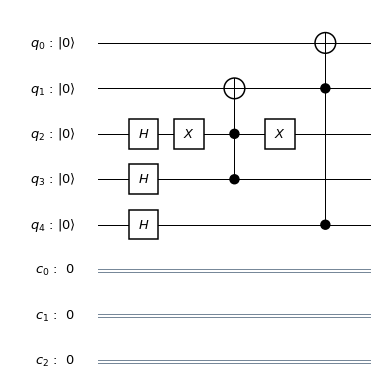

In [198]:
circ.x(q[2])
circ.ccx(q[2], q[3], q[1])
circ.ccx(q[4], q[1], q[0])
circ.x(q[2])
circ.draw(output='mpl')

# Conditional Phase Rotation

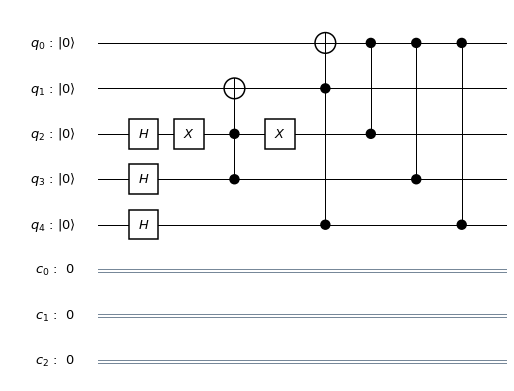

In [199]:
circ.cz(q[2], q[0])
circ.cz(q[3], q[0])
circ.cz(q[4], q[0])
circ.draw(output='mpl')

# Diffusion Transform

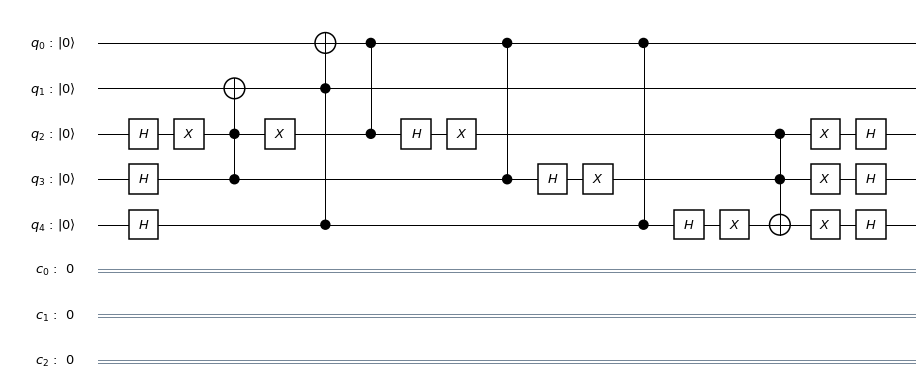

In [200]:
circ.h(q[2])
circ.h(q[3])
circ.h(q[4])

circ.x(q[2])
circ.x(q[3])
circ.x(q[4])

circ.ccx(q[2], q[3], q[4])

circ.x(q[2])
circ.x(q[3])
circ.x(q[4])

circ.h(q[2])
circ.h(q[3])
circ.h(q[4])
circ.draw(output='mpl')

# Final Measurements
This puts the results into the classical register in reverse order, to make the results more natural to read.

In [201]:
circ.measure(q[2], c[2])
circ.measure(q[3], c[1])
circ.measure(q[4], c[0])

# Execution on the QASM Simulator

{'101': 53, '001': 81, '011': 332, '111': 61, '010': 123, '110': 120, '100': 114, '000': 140}


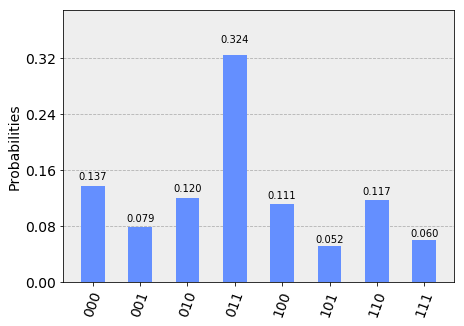

In [202]:
simulator = Aer.get_backend('qasm_simulator')
shotsResult = execute(circ, simulator).result()
counts = shotsResult.get_counts(circ)
print(counts)
plot_histogram(counts)